In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("Customer_retention.csv")

In [32]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
df.dropna(inplace=True)

In [40]:
df['Churn_Flag'] = df['Churn'].map({'Yes':1, 'No':0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Flag,CLV
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,0,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,2035.20
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,7430.40
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,325.60
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1,297.60


In [41]:
churn_rate = df['Churn_Flag'].mean() * 100
print("Overall Churn Rate:", round(churn_rate, 2), "%")

Overall Churn Rate: 26.58 %


Contract
Month-to-month    42.709677
One year          11.277174
Two year           2.848665
Name: Churn_Flag, dtype: float64


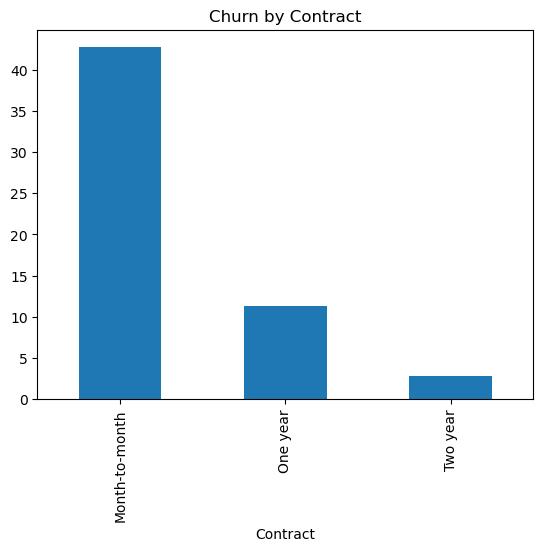

In [42]:
contract_churn = df.groupby('Contract')['Churn_Flag'].mean() * 100
print(contract_churn)

contract_churn.plot(kind='bar', title="Churn by Contract")
plt.show()

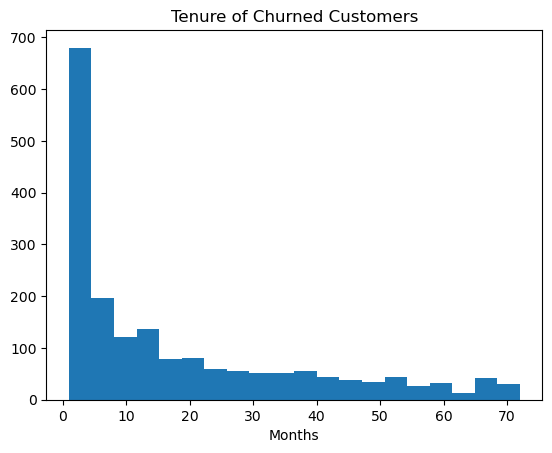

In [43]:
plt.hist(df[df['Churn']=="Yes"]['tenure'], bins=20)
plt.title("Tenure of Churned Customers")
plt.xlabel("Months")
plt.show()

In [45]:
df['CLV'] = df['MonthlyCharges'] * df['tenure']

print("Average CLV:", round(df['CLV'].mean(), 2))

Average CLV: 2283.15


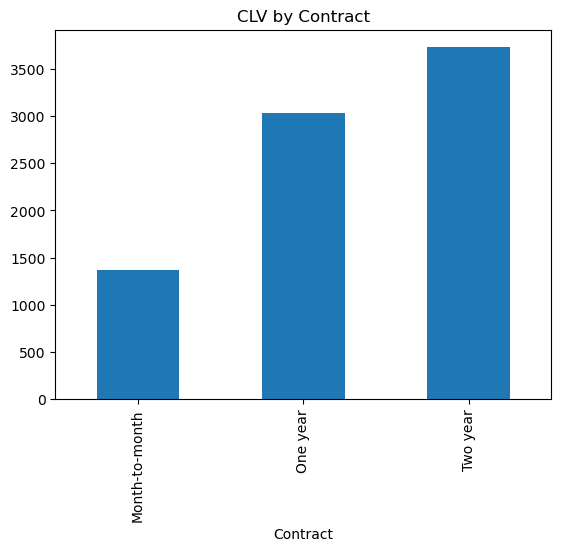

In [46]:
df.groupby('Contract')['CLV'].mean().plot(kind='bar', title="CLV by Contract")
plt.show()

In [47]:
high_risk = df[(df['Contract']=="Month-to-month") & (df['tenure'] < 12)]
print("High Risk Customers:", len(high_risk))

High Risk Customers: 1908
